# 1. ¿Qué es Pandas?

Pandas es una librería del lenguaje de programación Python que sirve para la manipulación y el análisis de datos. El nombre proviene de "panel data".

Pandas tiene numerosas funcionalidades que la hacen una de las mejores opciones para trabajar con datos, entre otras:

* Métodos integrados para la manipulación rápida de datos.
* Gestión de datos incompletos
* Segmentación
* Inserción y eliminación de columnas
* Mezcla y unión de datos
* Series temporales

La web del proyecto donde podremos encontrar la documentación es https://pandas.pydata.org/

In [1]:
# Para importar pandas en un proyecto

import pandas as pd

In [2]:
# Para importar numpy en un proyecto

import numpy as np

# 2. Tipos de datos en Pandas

Existen dos tipos de datos dentro de pandas, las series y los dataframes.

## [Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html)

Una serie en Pandas es un array unidimensional. Contiene cualquier tipo de dato soportado en Python y utiliza etiquetas para localizar cada valor de datos para su recuperación. Estas etiquetas forman el índice, y pueden ser incluir cadenas o números enteros. Una Serie es la principal estructura de datos en el framework de pandas para almacenar datos unidimensionales.

In [3]:
# Para crear una serie usamos
pd.Series

# Crear serie desde un diccionario
mi_diccionario = {"Madrid" : 100, "Huelva": 20, "Sevilla": 50, "Barcelona": 80, "Bilbao": 44}
s_ciudades = pd.Series(data=mi_diccionario)
s_ciudades

Madrid       100
Huelva        20
Sevilla       50
Barcelona     80
Bilbao        44
dtype: int64

In [4]:
# Crear serie desde listas
mi_lista = [100, 20, 50, 80, 44]
s_ciudades = pd.Series(data=mi_lista)
s_ciudades

0    100
1     20
2     50
3     80
4     44
dtype: int64

In [5]:
s_ciudades.index = ["Madrid", "Huelva", "Sevilla", "Barcelona", "Bilbao"]
s_ciudades

Madrid       100
Huelva        20
Sevilla       50
Barcelona     80
Bilbao        44
dtype: int64

### Atributos de la serie

In [6]:
# Tipo de dato
s_ciudades.dtype

dtype('int64')

In [7]:
# Tamaño
s_ciudades.size

5

In [8]:
# Índices
s_ciudades.index

Index(['Madrid', 'Huelva', 'Sevilla', 'Barcelona', 'Bilbao'], dtype='object')

### Acceso a los datos de la serie

In [9]:
# Por número entero
s_ciudades[0]

100

In [10]:
# Varios valores por número entero
s_ciudades[1:4]

Huelva       20
Sevilla      50
Barcelona    80
dtype: int64

In [11]:
# Por valor del índice
s_ciudades["Huelva"]

20

In [12]:
# Varios valores por valor del índice
s_ciudades[["Huelva", "Madrid"]]

Huelva     20
Madrid    100
dtype: int64

### Estadísticos descriptivos de una serie

In [13]:
# Número de elementos que no son NaN
s_ciudades.count()

5

In [14]:
# Suma de los datos (datos numéricos) o concatenación (cadenas)
s_ciudades.sum()

294

In [15]:
# Suma acumulativa (sólo datos numéricos)
s_ciudades.cumsum()

Madrid       100
Huelva       120
Sevilla      170
Barcelona    250
Bilbao       294
dtype: int64

In [16]:
# Obtener frecuencia de cada valor de la serie
s_ciudades.value_counts()

100    1
20     1
50     1
80     1
44     1
dtype: int64

In [17]:
# Obtener el menor valor de los datos de la serie (sólo datos numéricos)
s_ciudades.min()

20

In [18]:
# Obtener el mayor valor de los datos de la serie (sólo datos numéricos)
s_ciudades.max()

100

In [19]:
# Obtener la media del valor de los datos de la serie (sólo datos numéricos)
s_ciudades.mean()

58.8

In [20]:
# Obtener la desviación típica de lso datos de la serie (sólo datos numéricos)
s_ciudades.std()

31.41973901864877

In [21]:
# Obtener estadísticos descriptivos de la serie
s_ciudades.describe()

count      5.000000
mean      58.800000
std       31.419739
min       20.000000
25%       44.000000
50%       50.000000
75%       80.000000
max      100.000000
dtype: float64

### Operadores

Los operadores de python tanto aritméticos (+, -, *, /, **, % , y //) como relacionales (>, <, ==, >=, <= y !=) pueden usarse para hacer operaciones con una serie

In [22]:
s_ciudades + 1000

Madrid       1100
Huelva       1020
Sevilla      1050
Barcelona    1080
Bilbao       1044
dtype: int64

In [23]:
s_ciudades - 10

Madrid       90
Huelva       10
Sevilla      40
Barcelona    70
Bilbao       34
dtype: int64

In [24]:
s_ciudades / 3

Madrid       33.333333
Huelva        6.666667
Sevilla      16.666667
Barcelona    26.666667
Bilbao       14.666667
dtype: float64

In [25]:
s_ciudades ** 2

Madrid       10000
Huelva         400
Sevilla       2500
Barcelona     6400
Bilbao        1936
dtype: int64

In [26]:
s_ciudades > 80

Madrid        True
Huelva       False
Sevilla      False
Barcelona    False
Bilbao       False
dtype: bool

In [27]:
s_ciudades == 20

Madrid       False
Huelva        True
Sevilla      False
Barcelona    False
Bilbao       False
dtype: bool

### Funciones
Se pueden aplicar funciones a cada elemento de la serie utilizando el método apply

In [28]:
from math import sqrt
s_ciudades.apply(sqrt)

Madrid       10.000000
Huelva        4.472136
Sevilla       7.071068
Barcelona     8.944272
Bilbao        6.633250
dtype: float64

También podremos aplicar nuestras propias funciones

In [29]:
def get_hypotenuse_value(x):
    return sqrt(2*x**2)

s_ciudades.apply(get_hypotenuse_value)

Madrid       141.421356
Huelva        28.284271
Sevilla       70.710678
Barcelona    113.137085
Bilbao        62.225397
dtype: float64

In [30]:
s_ciudades.apply(lambda x: sqrt(2*x**2))

Madrid       141.421356
Huelva        28.284271
Sevilla       70.710678
Barcelona    113.137085
Bilbao        62.225397
dtype: float64

### Filtrar series

Podemos filtrar los valores de la serie y quedarnos con aquellos que cumplen una determinada condición

In [31]:
s_ciudades[s_ciudades < 50]

Huelva    20
Bilbao    44
dtype: int64

### Eliminar NaNs

In [32]:
s_ciudades = pd.Series(data={"Madrid" : 100, 
                             "Huelva": 20, 
                             "Sevilla": 50, 
                             "Barcelona": 80, 
                             "Bilbao": 44, 
                             "Tarragona": None,
                             "A Coruña": np.NaN
                            }
                      )
s_ciudades.dropna()

Madrid       100.0
Huelva        20.0
Sevilla       50.0
Barcelona     80.0
Bilbao        44.0
dtype: float64

## [Dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

Un Dataframe es una estructura de datos bidimensional etiquetada con columnas que pueden ser de tipos diferentes. Es parecido a una hoja de cálculo o una tabla SQL. Cada una de las columnas es una Serie. Es el objeto de la librería pandas más utilizado.

![Estructura Dataframe](recursos/01_dataframe.png)

[Gráfico extraído del curso de pandas de Juan Barrios](https://www.juanbarrios.com/curso-de-pandas-completo-desde-cero/)

### Creación de Dataframes

Un Dataframe puede crearse a partir de diferentes elementos

In [33]:
# Para crear un dataframe usamos
pd.DataFrame

# Crear DataFrame desde un diccionario de listas
mi_dict_l = {"ciudades": ["Madrid", "Huelva", "Sevilla", "Barcelona", "Bilbao"], 
             "n_churrerias": [100, 20, 50, 80, 44],
             "habitantes": [3223000, 144258, 688711, 1620000, 345821]
            }
df_c = pd.DataFrame(mi_dict_l)
df_c

,ciudades,n_churrerias,habitantes
0,Madrid,100,3223000
1,Huelva,20,144258
2,Sevilla,50,688711
3,Barcelona,80,1620000
4,Bilbao,44,345821


In [34]:
# Crear DataFrame desde una lista de listas
mi_ls_l = [["Madrid", 100, 3223000],
           ["Huelva", 20, 144258],
           ["Sevilla", 50, 688711],
           ["Barcelona", 80, 1620000],
           ["Bilbao", 44, 345821]
          ]
columnas = ["ciudades", "n_churrerias", "habitantes"]
df_c = pd.DataFrame(mi_ls_l, columns=columnas)
df_c

,ciudades,n_churrerias,habitantes
0,Madrid,100,3223000
1,Huelva,20,144258
2,Sevilla,50,688711
3,Barcelona,80,1620000
4,Bilbao,44,345821


In [35]:
# Crear DataFrame desde una lista de diccionarios
mi_ls_dict = [{"ciudades": "Madrid", "n_churrerias": 100, "habitantes": 3223000},
              {"ciudades": "Huelva", "n_churrerias": 20, "habitantes": 144258},
              {"ciudades": "Sevilla", "n_churrerias": 50, "habitantes": 688711},
              {"ciudades": "Barcelona", "n_churrerias": 80, "habitantes": 1620000},
              {"ciudades": "Bilbao", "n_churrerias": 44, "habitantes": 345821},
             ]

df_c = pd.DataFrame(mi_ls_dict)
df_c

,ciudades,n_churrerias,habitantes
0,Madrid,100,3223000
1,Huelva,20,144258
2,Sevilla,50,688711
3,Barcelona,80,1620000
4,Bilbao,44,345821


#### [Crear DataFrame a partir de un fichero CSV](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

In [36]:
df_c = pd.read_csv("recursos/02_city_data.csv", sep=";")
df_c

,ciudades,n_churrerias,habitantes
0,Madrid,100,3223000
1,Huelva,20,144258
2,Sevilla,50,688711
3,Barcelona,80,1620000
4,Bilbao,44,345821


#### [Crear DataFrame a partir de un fichero Excel](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)

In [37]:
df_c = pd.read_excel("recursos/03_city_data.xlsx")
df_c

,ciudades,n_churrerias,habitantes
0,Madrid,100,3223000
1,Huelva,20,144258
2,Sevilla,50,688711
3,Barcelona,80,1620000
4,Bilbao,44,345821


#### [Crear DataFrame a partir de un fichero JSON](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html)

In [38]:
df_c = pd.read_json("recursos/04_city_data.json")
df_c

,ciudades,n_churrerias,habitantes
0,Madrid,100,3223000
1,Huelva,20,144258
2,Sevilla,50,688711
3,Barcelona,80,1620000
4,Bilbao,44,345821


#### Exportar ficheros

#### [Exportar a CSV](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html)

In [39]:
df_c.to_csv("output.csv", sep="|", index=False)

#### [Exportar a Excel](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html)

In [40]:
df_c.to_excel("output.xlsx", index=False)

#### [Exportar a JSON](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_json.html)

In [41]:
df_c.to_json("output.json", orient="split", index=False)

### Atributos del DataFrame

In [42]:
# Información del DataFrame
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ciudades      5 non-null      object
 1   n_churrerias  5 non-null      int64 
 2   habitantes    5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 248.0+ bytes


In [43]:
# Número de filas y columnas
df_c.shape

(5, 3)

In [44]:
# Número de elementos
df_c.size

15

In [45]:
# Nombre de las columnas
df_c.columns

Index(['ciudades', 'n_churrerias', 'habitantes'], dtype='object')

In [46]:
# Nombre de las filas
df_c.index

RangeIndex(start=0, stop=5, step=1)

In [47]:
# Tipos de las columnas
df_c.dtypes

ciudades        object
n_churrerias     int64
habitantes       int64
dtype: object

In [48]:
# Devuelve las n primeras filas
df_c.head(2)

,ciudades,n_churrerias,habitantes
0,Madrid,100,3223000
1,Huelva,20,144258


In [49]:
# Devuelve las n últimas filas
df_c.tail(2)

,ciudades,n_churrerias,habitantes
3,Barcelona,80,1620000
4,Bilbao,44,345821


### Renombrar filas y columnas

#### [pd.rename](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html)

Podemos usar un diccionario y el método de pandas rename para cambiar el nombre de las filas o columnas

In [50]:
df_c.rename(columns= {"ciudades": "cities"})

,cities,n_churrerias,habitantes
0,Madrid,100,3223000
1,Huelva,20,144258
2,Sevilla,50,688711
3,Barcelona,80,1620000
4,Bilbao,44,345821


In [51]:
df_c.rename(str.upper, axis="columns")

,CIUDADES,N_CHURRERIAS,HABITANTES
0,Madrid,100,3223000
1,Huelva,20,144258
2,Sevilla,50,688711
3,Barcelona,80,1620000
4,Bilbao,44,345821


In [52]:
df_c.rename({0: "M", 1:"HU", 2:"SE", 3:"B", 4:"BI"})

,ciudades,n_churrerias,habitantes
M,Madrid,100,3223000
HU,Huelva,20,144258
SE,Sevilla,50,688711
B,Barcelona,80,1620000
BI,Bilbao,44,345821


#### Utilizando una lista para renombrar columnas e indices

In [53]:
df_c.columns = ["ciudades", "n_churrerias", "poblacion"]
df_c

,ciudades,n_churrerias,poblacion
0,Madrid,100,3223000
1,Huelva,20,144258
2,Sevilla,50,688711
3,Barcelona,80,1620000
4,Bilbao,44,345821


In [54]:
df_c.index = ["M", "HU", "SE", "B", "BI"]
df_c

,ciudades,n_churrerias,poblacion
M,Madrid,100,3223000
HU,Huelva,20,144258
SE,Sevilla,50,688711
B,Barcelona,80,1620000
BI,Bilbao,44,345821


### Acceder a los elementos de un DataFrame

#### Por número entero

In [55]:
df_c.iloc[4,0]

'Bilbao'

In [56]:
df_c.iloc[1:, 2]

HU     144258
SE     688711
B     1620000
BI     345821
Name: poblacion, dtype: int64

In [57]:
df_c.iloc[2]

ciudades        Sevilla
n_churrerias         50
poblacion        688711
Name: SE, dtype: object

#### Por nombres

In [58]:
df_c.loc[["SE","B"], ["poblacion"]]

,poblacion
SE,688711
B,1620000


In [59]:
df_c["n_churrerias"]

M     100
HU     20
SE     50
B      80
BI     44
Name: n_churrerias, dtype: int64

### Añadir columnas

In [60]:
df_c["rios"] = [1, 2, 1, 0, np.NaN]
df_c

,ciudades,n_churrerias,poblacion,rios
M,Madrid,100,3223000,1.0
HU,Huelva,20,144258,2.0
SE,Sevilla,50,688711,1.0
B,Barcelona,80,1620000,0.0
BI,Bilbao,44,345821,NaN


### Operaciones con columnas
Como las columnas de un DataFrame son series, podremos aplicar las mismas operaciones que con las series

In [61]:
df_c["n_churrerias"] * 2

M     200
HU     40
SE    100
B     160
BI     88
Name: n_churrerias, dtype: int64

In [62]:
df_c["rios"] > 1

M     False
HU     True
SE    False
B     False
BI    False
Name: rios, dtype: bool

También podremos hacer operaciones con varias columnas

In [63]:
# Obtener churrerías per cápita
df_c["n_churrerias"] / df_c["poblacion"]

M     0.000031
HU    0.000139
SE    0.000073
B     0.000049
BI    0.000127
dtype: float64

### Funciones
Se pueden aplicar funciones a un DataFrame usando las funciones apply y applymap

#### [pd.apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)

Para aplicar una función a un DataFrame. Tienen varias opciones, como por ejemplo si se quiere aplicar por filas o columnas...

In [64]:
df_c["poblacion"].apply(np.sqrt)

M     1795.271567
HU     379.813112
SE     829.886137
B     1272.792206
BI     588.065473
Name: poblacion, dtype: float64

#### [pd.applymap](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)
Para aplicar una función a un DataFrame entero.

In [65]:
df_c[["poblacion", "n_churrerias"]].applymap(sqrt)

,poblacion,n_churrerias
M,1795.271567,10.000000
HU,379.813112,4.472136
SE,829.886137,7.071068
B,1272.792206,8.944272
BI,588.065473,6.633250


### Estadísticos descriptivos de un DataFrame

In [66]:
# Número de elementos del df que no son NaN
df_c.count()

ciudades        5
n_churrerias    5
poblacion       5
rios            4
dtype: int64

In [67]:
# Suma de los datos del df
df_c.sum()

ciudades        MadridHuelvaSevillaBarcelonaBilbao
n_churrerias                                   294
poblacion                                  6021790
rios                                           4.0
dtype: object

In [68]:
# Suma acumulativa del df
df_c.cumsum()

,ciudades,n_churrerias,poblacion,rios
M,Madrid,100,3223000,1.0
HU,MadridHuelva,120,3367258,3.0
SE,MadridHuelvaSevilla,170,4055969,4.0
B,MadridHuelvaSevillaBarcelona,250,5675969,4.0
BI,MadridHuelvaSevillaBarcelonaBilbao,294,6021790,NaN


In [69]:
# Obtener frecuencia de cada valor del df
df_c.value_counts()

ciudades   n_churrerias  poblacion  rios
Barcelona  80            1620000    0.0     1
Huelva     20            144258     2.0     1
Madrid     100           3223000    1.0     1
Sevilla    50            688711     1.0     1
dtype: int64

In [70]:
# Obtener el menor valor de los datos del df
df_c.min()

ciudades        Barcelona
n_churrerias           20
poblacion          144258
rios                  0.0
dtype: object

In [71]:
# Obtener el mayor valor de los datos del df
df_c.max()

ciudades        Sevilla
n_churrerias        100
poblacion       3223000
rios                2.0
dtype: object

In [72]:
# Obtener la media del valor de los datos numéricos del df
df_c[["poblacion", "n_churrerias"]].mean()

poblacion       1204358.0
n_churrerias         58.8
dtype: float64

In [73]:
# Obtener la desviación típica de los datos númericos del df
df_c[["poblacion", "n_churrerias"]].std()

poblacion       1.262385e+06
n_churrerias    3.141974e+01
dtype: float64

In [74]:
# Obtener estadísticos descriptivos del df
df_c.describe()

,n_churrerias,poblacion,rios
count,5.000000,5.000000e+00,4.000000
mean,58.800000,1.204358e+06,1.000000
std,31.419739,1.262385e+06,0.816497
min,20.000000,1.442580e+05,0.000000
25%,44.000000,3.458210e+05,0.750000
50%,50.000000,6.887110e+05,1.000000
75%,80.000000,1.620000e+06,1.250000
max,100.000000,3.223000e+06,2.000000


### Eliminar columnas

In [75]:
df_c["dummy_col1"] = 0
df_c["dummy_col2"] = "a"
df_c

,ciudades,n_churrerias,poblacion,rios,dummy_col1,dummy_col2
M,Madrid,100,3223000,1.0,0,a
HU,Huelva,20,144258,2.0,0,a
SE,Sevilla,50,688711,1.0,0,a
B,Barcelona,80,1620000,0.0,0,a
BI,Bilbao,44,345821,NaN,0,a


In [76]:
del df_c["dummy_col1"]
df_c

,ciudades,n_churrerias,poblacion,rios,dummy_col2
M,Madrid,100,3223000,1.0,a
HU,Huelva,20,144258,2.0,a
SE,Sevilla,50,688711,1.0,a
B,Barcelona,80,1620000,0.0,a
BI,Bilbao,44,345821,NaN,a


In [77]:
df_c.pop("dummy_col2")

M     a
HU    a
SE    a
B     a
BI    a
Name: dummy_col2, dtype: object

### Eliminar filas/Columnas 

#### [pd.drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)

In [78]:
df_c.drop(["M", "B"])

,ciudades,n_churrerias,poblacion,rios
HU,Huelva,20,144258,2.0
SE,Sevilla,50,688711,1.0
BI,Bilbao,44,345821,NaN


In [79]:
df_c.drop("rios", axis=1)

,ciudades,n_churrerias,poblacion
M,Madrid,100,3223000
HU,Huelva,20,144258
SE,Sevilla,50,688711
B,Barcelona,80,1620000
BI,Bilbao,44,345821


### Filtrar filas

Para filtrar filas se le pasa una lista o serie con booleanos al dataframe. También pueden ponerse las condiciones directamente y poner varias condiciones. En este último caso cada condición hay que ponerla entre corchetes.

In [80]:
df_c[df_c["n_churrerias"] <= 50]

,ciudades,n_churrerias,poblacion,rios
HU,Huelva,20,144258,2.0
SE,Sevilla,50,688711,1.0
BI,Bilbao,44,345821,NaN


In [81]:
df_c[(df_c["n_churrerias"] <= 50) & (df_c["rios"] > 0)]

,ciudades,n_churrerias,poblacion,rios
HU,Huelva,20,144258,2.0
SE,Sevilla,50,688711,1.0


In [82]:
df_c[(df_c["ciudades"].str[0] == "B") | (df_c["rios"] >= 2)]

,ciudades,n_churrerias,poblacion,rios
HU,Huelva,20,144258,2.0
B,Barcelona,80,1620000,0.0
BI,Bilbao,44,345821,NaN


### Ordenar filas

#### [pd.sort_values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)
Sirve para ordenar los valores del df en función de una columna

In [83]:
df_c.sort_values("ciudades", ascending=True)

,ciudades,n_churrerias,poblacion,rios
B,Barcelona,80,1620000,0.0
BI,Bilbao,44,345821,NaN
HU,Huelva,20,144258,2.0
M,Madrid,100,3223000,1.0
SE,Sevilla,50,688711,1.0


In [84]:
df_c.sort_values("poblacion", ascending=False)

,ciudades,n_churrerias,poblacion,rios
M,Madrid,100,3223000,1.0
B,Barcelona,80,1620000,0.0
SE,Sevilla,50,688711,1.0
BI,Bilbao,44,345821,NaN
HU,Huelva,20,144258,2.0


#### [pd.sort_index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html)
Sirve para ordenar los valores del df en función del índice

In [85]:
df_c.sort_index(ascending=False)

,ciudades,n_churrerias,poblacion,rios
SE,Sevilla,50,688711,1.0
M,Madrid,100,3223000,1.0
HU,Huelva,20,144258,2.0
BI,Bilbao,44,345821,NaN
B,Barcelona,80,1620000,0.0


### Usar una lista para Ordenar/Eliminar columnas 

Puede ordenarse o eliminarse las columnas de un df pasándole una lista con los nombres de las columnas 

In [86]:
df_c[['poblacion', 'n_churrerias', 'rios']]

,poblacion,n_churrerias,rios
M,3223000,100,1.0
HU,144258,20,2.0
SE,688711,50,1.0
B,1620000,80,0.0
BI,345821,44,NaN


### Eliminar NaNs

#### [pd.dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)

In [87]:
df_c.dropna()

,ciudades,n_churrerias,poblacion,rios
M,Madrid,100,3223000,1.0
HU,Huelva,20,144258,2.0
SE,Sevilla,50,688711,1.0
B,Barcelona,80,1620000,0.0


In [88]:
df_c.dropna(axis=1)

,ciudades,n_churrerias,poblacion
M,Madrid,100,3223000
HU,Huelva,20,144258
SE,Sevilla,50,688711
B,Barcelona,80,1620000
BI,Bilbao,44,345821


In [89]:
df_c.dropna(subset=["ciudades", "n_churrerias"], axis=0)

,ciudades,n_churrerias,poblacion,rios
M,Madrid,100,3223000,1.0
HU,Huelva,20,144258,2.0
SE,Sevilla,50,688711,1.0
B,Barcelona,80,1620000,0.0
BI,Bilbao,44,345821,NaN


### Rellenar NaNs

#### [pd.fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)

In [90]:
df_c.fillna(4)

,ciudades,n_churrerias,poblacion,rios
M,Madrid,100,3223000,1.0
HU,Huelva,20,144258,2.0
SE,Sevilla,50,688711,1.0
B,Barcelona,80,1620000,0.0
BI,Bilbao,44,345821,4.0


In [91]:
df_c.fillna(method="ffill")

,ciudades,n_churrerias,poblacion,rios
M,Madrid,100,3223000,1.0
HU,Huelva,20,144258,2.0
SE,Sevilla,50,688711,1.0
B,Barcelona,80,1620000,0.0
BI,Bilbao,44,345821,0.0


In [92]:
df_c.fillna(method="bfill")

,ciudades,n_churrerias,poblacion,rios
M,Madrid,100,3223000,1.0
HU,Huelva,20,144258,2.0
SE,Sevilla,50,688711,1.0
B,Barcelona,80,1620000,0.0
BI,Bilbao,44,345821,NaN


### Concatenar DataFrames

#### [pd.concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)

In [93]:
df_c2 = pd.DataFrame({"ciudades": ["Cordoba", "Valencia"], 
                      "n_churrerias": [10, 67],
                      "poblacion": [325708, 791413],
                      "rios" : [1, 1]
                     }, index=["CO", "V"])

df_c = pd.concat([df_c, df_c2])
df_c

,ciudades,n_churrerias,poblacion,rios
M,Madrid,100,3223000,1.0
HU,Huelva,20,144258,2.0
SE,Sevilla,50,688711,1.0
B,Barcelona,80,1620000,0.0
BI,Bilbao,44,345821,NaN
CO,Cordoba,10,325708,1.0
V,Valencia,67,791413,1.0


### Eliminar duplicados

#### [pd.drop_duplicates](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)

In [94]:
df_dup = pd.concat([df_c, df_c])
df_dup

,ciudades,n_churrerias,poblacion,rios
M,Madrid,100,3223000,1.0
HU,Huelva,20,144258,2.0
SE,Sevilla,50,688711,1.0
B,Barcelona,80,1620000,0.0
BI,Bilbao,44,345821,NaN
CO,Cordoba,10,325708,1.0
V,Valencia,67,791413,1.0
M,Madrid,100,3223000,1.0
HU,Huelva,20,144258,2.0
SE,Sevilla,50,688711,1.0


In [95]:
df_dup.drop_duplicates()

,ciudades,n_churrerias,poblacion,rios
M,Madrid,100,3223000,1.0
HU,Huelva,20,144258,2.0
SE,Sevilla,50,688711,1.0
B,Barcelona,80,1620000,0.0
BI,Bilbao,44,345821,NaN
CO,Cordoba,10,325708,1.0
V,Valencia,67,791413,1.0


In [96]:
df_dup.drop_duplicates(subset=["rios"])

,ciudades,n_churrerias,poblacion,rios
M,Madrid,100,3223000,1.0
HU,Huelva,20,144258,2.0
B,Barcelona,80,1620000,0.0
BI,Bilbao,44,345821,NaN


### Cambiar tipo de dato

In [97]:
df_c["rios"].fillna(0).astype("int32")

M     1
HU    2
SE    1
B     0
BI    0
CO    1
V     1
Name: rios, dtype: int32

### Iterar por filas

In [98]:
for idx, row in df_c.iterrows():
    print(idx, "\t", row["ciudades"])

M 	 Madrid
HU 	 Huelva
SE 	 Sevilla
B 	 Barcelona
BI 	 Bilbao
CO 	 Cordoba
V 	 Valencia


### Trasponer DataFrame

In [99]:
df_c.T

,M,HU,SE,B,BI,CO,V
ciudades,Madrid,Huelva,Sevilla,Barcelona,Bilbao,Cordoba,Valencia
n_churrerias,100,20,50,80,44,10,67
poblacion,3223000,144258,688711,1620000,345821,325708,791413
rios,1.0,2.0,1.0,0.0,NaN,1.0,1.0


### Sustituir valores

#### [pd.replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)
Sirve para sustituir un valor o conjunto de valores por otros. Acepta como entradas un valor o lista de valores y como valor de sustitución un valor o lista de valores. Puede usarse un diccionario. También puede especificarse que se sustituyan los valores por los anteriores o posteriores.

In [100]:
df_c["ccaa"] = ["C.Madrid", "Andalucía", "Andalucía", "Cataluña", "País Vasco", "Andalucía", "C.Valenciana"]

In [101]:
df_c["ccaa"].replace({"Andalucía": "01", 
                      "C.Madrid": "13", 
                      "Cataluña": "09", 
                      "C.Valenciana": "10",
                      "País Vasco": "16"})

M     13
HU    01
SE    01
B     09
BI    16
CO    01
V     10
Name: ccaa, dtype: object

In [102]:
df_c["ciudades"].replace("Cordoba", "Córdoba")

M        Madrid
HU       Huelva
SE      Sevilla
B     Barcelona
BI       Bilbao
CO      Córdoba
V      Valencia
Name: ciudades, dtype: object

In [103]:
df_c["ciudades"].replace(["Madrid", "Bilbao"], ["M", "BI"])

M             M
HU       Huelva
SE      Sevilla
B     Barcelona
BI           BI
CO      Cordoba
V      Valencia
Name: ciudades, dtype: object

#### Sustituir valores de forma condicional

In [104]:
df_c.iloc[0,0] = "M"
df_c

,ciudades,n_churrerias,poblacion,rios,ccaa
M,M,100,3223000,1.0,C.Madrid
HU,Huelva,20,144258,2.0,Andalucía
SE,Sevilla,50,688711,1.0,Andalucía
B,Barcelona,80,1620000,0.0,Cataluña
BI,Bilbao,44,345821,NaN,País Vasco
CO,Cordoba,10,325708,1.0,Andalucía
V,Valencia,67,791413,1.0,C.Valenciana


In [105]:
df_c.loc[df_c["ciudades"].str.len() < 2, "ciudades"] = "Madrid"
df_c

,ciudades,n_churrerias,poblacion,rios,ccaa
M,Madrid,100,3223000,1.0,C.Madrid
HU,Huelva,20,144258,2.0,Andalucía
SE,Sevilla,50,688711,1.0,Andalucía
B,Barcelona,80,1620000,0.0,Cataluña
BI,Bilbao,44,345821,NaN,País Vasco
CO,Cordoba,10,325708,1.0,Andalucía
V,Valencia,67,791413,1.0,C.Valenciana


### Uniendo DataFrames

#### [pd.merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)
El merge sirve para unir DataFrames o Series con nombres con un join al estilo de los lenguajes de bases de datos como SQL. El join se hace en columnas o índices y se pueden hacer left joins, right joins, productos cartesianos...

In [106]:
df_ccaa = pd.read_csv("recursos/05_ccaa_ine_catalog.csv", sep=";", dtype={"Código": str})
df_ccaa

,Código,Literal
0,01,Andalucía
1,02,Aragón
2,03,"Asturias, Principado de"
3,04,"Balears, Illes"
4,05,Canarias
5,06,Cantabria
6,07,Castilla y León
7,08,Castilla - La Mancha
8,09,Cataluña
9,10,Comunitat Valenciana


In [107]:
df_c.merge(df_ccaa, how="inner", left_on="ccaa", right_on="Literal")

,ciudades,n_churrerias,poblacion,rios,ccaa,Código,Literal
0,Huelva,20,144258,2.0,Andalucía,01,Andalucía
1,Sevilla,50,688711,1.0,Andalucía,01,Andalucía
2,Cordoba,10,325708,1.0,Andalucía,01,Andalucía
3,Barcelona,80,1620000,0.0,Cataluña,09,Cataluña
4,Bilbao,44,345821,NaN,País Vasco,16,País Vasco


### Pivot / Unpivot tables

#### [pd.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html)
Despivota un DataFrame convirtiéndolo de formato ancho a largo

In [108]:
pd.melt(df_c)

,variable,value
0,ciudades,Madrid
1,ciudades,Huelva
2,ciudades,Sevilla
3,ciudades,Barcelona
4,ciudades,Bilbao
5,ciudades,Cordoba
6,ciudades,Valencia
7,n_churrerias,100
8,n_churrerias,20
9,n_churrerias,50


In [109]:
pd.melt(df_c, id_vars=["ccaa", "ciudades"])

,ccaa,ciudades,variable,value
0,C.Madrid,Madrid,n_churrerias,100.0
1,Andalucía,Huelva,n_churrerias,20.0
2,Andalucía,Sevilla,n_churrerias,50.0
3,Cataluña,Barcelona,n_churrerias,80.0
4,País Vasco,Bilbao,n_churrerias,44.0
5,Andalucía,Cordoba,n_churrerias,10.0
6,C.Valenciana,Valencia,n_churrerias,67.0
7,C.Madrid,Madrid,poblacion,3223000.0
8,Andalucía,Huelva,poblacion,144258.0
9,Andalucía,Sevilla,poblacion,688711.0


In [110]:
pd.melt(df_c, id_vars=["ciudades"], value_vars=["n_churrerias"])

,ciudades,variable,value
0,Madrid,n_churrerias,100
1,Huelva,n_churrerias,20
2,Sevilla,n_churrerias,50
3,Barcelona,n_churrerias,80
4,Bilbao,n_churrerias,44
5,Cordoba,n_churrerias,10
6,Valencia,n_churrerias,67


#### [pd.pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)
Crear una tabla pivotante estilo hoja de cálculo como un DataFrame.

Los niveles de la tabla pivotante se almacenarán en objetos MultiIndex (índices jerárquicos) sobre el índice y las columnas del DataFrame resultante.

In [111]:
pd.pivot_table(df_c, index="ccaa", values=["n_churrerias", "poblacion", "rios"], aggfunc="sum")

,n_churrerias,poblacion,rios
ccaa,,,
Andalucía,80,1158677,4.0
C.Madrid,100,3223000,1.0
C.Valenciana,67,791413,1.0
Cataluña,80,1620000,0.0
País Vasco,44,345821,0.0


### Agrupar valores de un DataFrame

#### [df.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)
Una operación groupby implica una combinación de división del objeto, aplicación de una función y combinación de los resultados. Puede utilizarse para agrupar grandes cantidades de datos y calcular operaciones sobre estos grupos.

Las funciones de agregación son:

* np.min : Devuelve el mínimo de una lista de valores.
* np.max : Devuelve el máximo de una lista de valores.
* np.count_nonzero : Devuelve el número de valores no nulos de una lista de valores.
* np.sum : Devuelve la suma de una lista de valores.
* np.mean : Devuelve la media de una lista de valores.
* np.std : Devuelve la desviación típica de una lista de valores.


In [112]:
df_c[["ccaa", "n_churrerias", "poblacion", "rios"]].groupby(["ccaa"]).agg(np.sum)

,n_churrerias,poblacion,rios
ccaa,,,
Andalucía,80,1158677,4.0
C.Madrid,100,3223000,1.0
C.Valenciana,67,791413,1.0
Cataluña,80,1620000,0.0
País Vasco,44,345821,0.0


# 3. Dibujando gráficos con Pandas
Pandas integra métodos para poder dibujar gráficos de nuestras series o DataFrames de forma fácil y sencilla. Para ello usa la librería de gráficos de python matplotlib.


<AxesSubplot:>

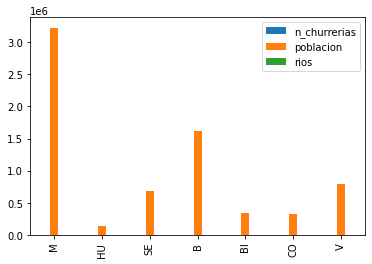

In [113]:
df_c.plot.bar()

<AxesSubplot:xlabel='poblacion', ylabel='n_churrerias'>

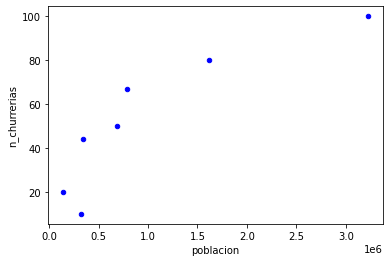

In [114]:
df_c.plot.scatter(x="poblacion", y="n_churrerias", c="Blue")

<AxesSubplot:ylabel='rios'>

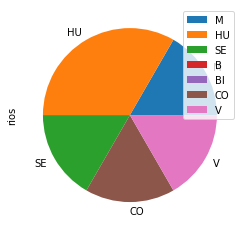

In [115]:
df_c.plot.pie(y="rios")